---
---
Recitation 11: Machine Learning II

Applied Data Science using Python

New York University, Abu Dhabi

Dated: 16th Nov 2023

---
---
#Start Here
## Learning Goals
### General Goals
- Learn the fundamental concepts of applied machine learning
- Learn the fundamental concepts of supervised learning

### Specific Goals
- Learn the basics of regression
- Learn to apply different models of regression:
    - linear regression
    - polynomial regression
- Understand bias-variance Tradeoff
- Understand the basic concept of cross validation
- Understand the basic concept of regularization (L1 vs. L2)
- Learn to evaluate and compare the performance of your regression models

## Distribution of Class Materials
These problem sets and recitations are intellectual property of NYUAD, and we request the students to **not** distribute them or their solutions to other students who have not signed up for this class, and/or intend to sign up in the future. We also request you don't post these problem sets, and recitations online or on any public platforms.

## Submission
You will submit all your code as a Python Notebook through [Brightspace](https://brightsapce.nyu.edu/) as **R11_YOUR NETID.ipynb**.

---




# General Instructions
This recitation is worth 50 points. It has 3 parts. All the parts need to be completed in a Jupyter (Colab) Notebook attached with this handout.



# Basics

There are five important concepts needed to be understood before attempting the tasks below <Sup>1</Sup>:

--------------
<sup>1. Don't get intimidated by the equations. If you read the document carefully, they are very easy to understand!</sup>

##1. Regularization

In supervised machine learning, models are trained on a subset of data also known as the training set. The goal is to compute the target of each training example from the training data. Now, **overfitting** happens when model learns signal as well as noise in the training data and wouldn't perform well on new data on which model wasn't trained on. What this means is that the noise or random fluctuations in the training data are picked up and learned as *concepts* by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize. In other words, your model has **high variance**.

![cv](https://drive.google.com/uc?id=1-4gUrP5Hbv-ioIEVhuso7gc-lXfeWnYs)

If you think about it, **in a philosophical sense**, whenever you are training any machine learning model, you are almost always overfitting -- just by the logic that you only have a sample of the data available at your disposal. It's a matter of what extent of overfitting are you OK with. Typically, at the very least, you need to avoid enough overfitting such that your model generalizes on your held-out unseen **test set**. Actually, often that's the best you can do. After that, all you can do is pray that it generalizes to the real world data which you don't have access to.

Now, there are a few ways you can avoid overfitting your model on training data like *increasing the size of your training set (i.e. rows)*, *reducing the number of features*, *splitting your data into train-validation-test set (more on that later)*, *pruning (more on that later)*, *cross-validation sampling (more on that later)*, and well, **regularization**.

----
WHAT IS REGULARIZATION?

----
Regularization is a technique used to reduce the error by fitting a function appropriately on the given training set to avoid overfitting. Regularization, significantly reduces the variance of the model, without substantial increase in its bias. It works by adding an additional **penalty term** in the **error function** or **loss function** of the model. This additional term controls the coefficients of the model so that they don't take extreme values. This technique of keeping a check or reducing the value of error coefficients is also called **shrinkage methods** in statistics -- term **shrinkage** as these methods *shrink* the effects of sampling variation, and hence avoid overfitting.

----

If the paragraph above was too abstract, let's break it down for better understanding.

We know that a linear regression looks like the following:

$$\hat{y} = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + ... +  w_{n}x_{n} + b$$

where $\hat{y}$ is your estimation/prediction, $w_{1}, w_{2}, w_{3}, ...,  w_{n}$ represent the coefficient estimates for features $x_{1}, x_{2}, ..., x_{n}$ respectively, and $b$ is the bias.

The above equation can be compactly written as

$$\hat{y} = \sum \limits _{j=1} ^{n} w_{j}x_{j} + b$$

Given the above, what we are typically trying to learn are the weights $w_{j}$ and the bias $b$ for $j=\{1,...n\}$.

How do we do that?

Well, we define an error metric or a function (eg. squared error), and try to learn the weights that decrease the error/loss. In other words, we try to minimize the following *loss function*:

$$Loss=Error(y,\hat{y})$$

What is an $Error$. Well in a simple sense, we want our prediction/estimate i.e. $\hat{y}$ to be as close to our actual target variable $y$, and so we can define $Error$ to simply be $y-\hat{y}$. However, for a mathematical reason, we typically square this error i.e. we define error as a **[residual sum of squares (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares)**, and so we can write our $Loss$ to be:

$$Loss= Error(y,\hat{y})=(y - \hat{y})^2$$

Why do we define our loss function as a **residual sum of squares (RSS)**? Let's just say it makes finding the optimal set of parameters quicker.

Now the above loss function is defined when there is **no regularization**. When we are **regularizing**, on the other hand, we add another term to the loss function $R$ as follows:

$$Loss= (y - \hat{y})^2 + \lambda R$$

where $\lambda$ tells the model how much you want to penalize your model for complexity.

We can substitute the $\hat{y}$ so that

$$Loss= (y - \sum \limits _{j=1} ^{n} w_{j}x_{j} - b)^2 + \lambda R$$

and finally, if we were to define the loss over each instance (i.e. row in the training set), and if there were $m$ instances, then what we are really trying to minimize is the following loss function:

$$Loss= \sum \limits _{i=1} ^{m}(y_{i} - \sum \limits _{j=1} ^{n} w_{j}x_{ij} - b)^2 + \lambda R$$

Following so far, right? Any questions?

Now what is this $R$ really, and what is the effect of it? Well, to understand that, it is useful to know that there are two popular choices of regularizers in machine learning, **L1 (or Lasso)** and **L2 (or Ridge)**, and they differ on how $R$ is defined.




### L2-regularization (Ridge)

In an L2 regularization,

$$ R = \sum \limits _{j=1} ^{n} {w_{j}}^2$$

and so the loss becomes

$$Loss= \sum \limits _{i=1} ^{m}(y_{i} - \sum \limits _{j=1} ^{n} w_{j}x_{ij} - b)^2 + \lambda \sum \limits _{j=1} ^{n} {w_{j}}^2$$

Think what is *really* happening here! After defining the $R$ as above, if we want to minimize the loss, what needs to happen?

Well, what needs to happen is that, the coefficients $w_{1}, w_{2}, ...w{n}$ need to be small. If that does not happen, then the regularization term will increase, and so the loss will increase. In other words, the L2 regularization is telling the model that:

"***Hey don't fit a very complex model by learning very large weights (or coefficients), otherwise I will penalize you, and your loss will be high!***"

Now, if your $\lambda$ is zero, then you can imagine we get back the same old linear regression model without regularization as the whole $R$ term becomes zero. Alternatively, if $\lambda$ is very large then it will lead to under-fitting.

This is why it is very important as to how you choose your $\lambda$. In fact, how you choose $\lambda$ is very similar to how you chose $k$ in the *kNN* model i.e. by defining a range, and trying out your model on different values of $\lambda$.


### L1-regularization (Lasso)

In an L1 regularization on the other hand,

$$ R = \sum \limits _{j=1} ^{n} |w_{j}|$$

and so the loss becomes

$$Loss= \sum \limits _{i=1} ^{m}(y_{i} - \sum \limits _{j=1} ^{n} w_{j}x_{ij} - b)^2 + \lambda \sum \limits _{j=1} ^{n} |w_{j}|$$

Basically, what happened here is that the square ($^2$) in the $R$ term went away and was replaced by a modulus (or absolute value). This is known as the **L1 norm**.

### Lasso versus Ridge

Ok, so you understand that there are two types of regularizers, and they modify the loss function by changing how $R$ is defined. But what is the difference between the two different ways? When to choose one over the other?

**The difference is in how your model behaves.** Both of the regularizers will reduce the weights/coefficients of the features, *but they will do so differently*: Ridge regularization will shrink the coefficients for least important features, very close to zero. But, **it will never make them exactly zero**. In other words, the final Ridge regularization based model will include **all** the features.

On the other hand, in the case of Lasso, the L1 penalty has the effect of forcing some of the coeﬃcient estimates to be **exactly equal to zero** when the tuning parameter $\lambda$ is suﬃciently large. Therefore, the Lasso method also performs **feature selection** and is said to yield **sparser models**. Sparser models are also quite interpretable as they tell us which features contributed the most in predicting the target variable.

When we say **sparsity** in the model, what we mean is that out of all the features, only some features remained, and others became zero because their coefficients became zero. Hence, your model became sparser.

So, if you don't want sparsity in the model, and want your model to use all the features, you may choose L2 norm (or Ridge regression). On the other hand, if you want to do feature selection while dealing with overfitting, you may choose L1 norm (or Lasso regression).

The math of how exactly Lasso achieves model sparsity, and of how exactly Ridge works, is a bit involved, and you don't need to know it as such, but you can read about it [here](https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a#:~:text=This%20is%20a%20form%20of,linear%20regression%20looks%20like%20this.) and [here](https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea#:~:text=Regularization%20is%20a%20technique%20used,don't%20take%20extreme%20values.). For the purposes of this class, all you need to know is the basic understanding of regularization, the difference between the effect of the two commonly used regularizers, and how to use and tune them in practice to avoid overfitting.

Now go back to the paragraph on `WHAT IS REGULARIZATION?` above, and hopefully, it will make much more sense.

##2. Train-Validation-Test Split
In your class so far, you have learnt that your data should be split into two sets as part of the data preparation for the  modeling, analysis, and evaluation of machine learning tasks.

When you are doing real research, however, and training a model, you typically split your data into three sets, not two sets:

- *train* set
- *validation or development* set, and
- *test* set.

You use the **training set** to train your model, and evaluate it on the **validation set**. You further tune your model (eg. change k in kNN, change distance parameter p, change weights, change C and kernel in SVMs, and other model specific parameters), and evaluate your model again, and again and again on the training set and the validation set.

Once you are satisfied with the performance of your model on the validation set, you then combine the train and validation set, and retrain your model on the **train+validation** set.

Only at the time of reporting your results to the world, you pass the test set through your model, and report the evaluation of the test set in the research paper. **You don't use the test set until the very end.** In other words, your test set is hidden until the very end. Once you have evaluated the performance of your model on the test set, you do **not** tune your model any further as you have now seen the performance of your model on the test set, and tuning your model further would mean you are overfitting to the test set, which is somewhat *unethical*. If you are working in the industry, and deploying a model to the real world, you do everything exactly as above, except at the end, you also combine your test set with the training and validation set, and retrain your model on the entire dataset. But as long as evaluation is concerned, doing the above is a standard. In statistics, this process of having a *held-out* evaluation test set that your model has not seen until the end -- not even while tuning and selecting the model -- is also known as **out-of-sample evaluation**. This is the most ethical and reasonable approach to reporting results.


##3. Cross Validation (CV)
Of course, **how** you create your train-validation-test split is also very important. Typically, your validation and test set should be representative of the training set. The exact details vary across tasks, and you have and will learn that working on different datasets.

However, often, these decisions are ad-hoc (eg. 75-25 split), and hence, your model may still suffer from issues of high variance. This is because it is not certain which data points will end up in the validation, and test set, and the evaluation results might be entirely different for different sets. For example, while using different `random_state` seed arguments while splitting data, you must have noticed that the performance varies slightly across different splits. That is because every time a split is created, the distribution of the target, and the feature values vary (even if this change is very little). Just ensuring that your validation and test set are an out-of-sample representative of the training set is a hard task in itself.

Furthermore, because machine learning models are *data hungry*, there is never enough data to train your model, and removing a part of it for validation/testing  poses a problem of underfitting. By reducing the training data, we risk losing important patterns/trends in data set, which in turn increases error induced by bias. So, what we require is a method that provides ample data for training the model and also leaves ample data for validation. This is what a **k-fold cross validation** does.

In a **k-Fold cross validation**, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set, and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. Every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, k = 5 or 10 is generally preferred, but nothing's fixed and it can take any value. There is also an *n-fold* cross-validation where $n$ is the number of instances/rows in your dataset as such each time, there is only 1 instance in the validation/testing set. This is also known as **leave-one-out cross validation**.

Now, cross validation as a method is used in two scenarios: (i) at the time of evaluation, and (ii) at the time of tuning.

These scenarios vary based on your dataset size and task.

### Cross Validation at the time of evaluation

Using cross validation at the time of evaluation is very common when you have small dataset. In that case, splitting your data into a train, validation, and test set becomes very hard. Hence, you use cross-validation to test your model, and then you report either the average performance across the k-folds, or simply report all the performance values for all the folds if you want to be verbose and very transparent.

You may also choose to do this if your dataset is not small, but you think creating a representative test set is not feasible.

![cv](https://drive.google.com/uc?id=1tKOBY9HCuVNom4uIwW4lKtVOTaCFKSQD)



### Cross Validation at the time of tuning

This is arguably a more common usage of cross validation where you would create or have a test-set, but instead of creating a validation set, you would use k-fold cross validation to select your hyper-parameters to tune your model. At the end, you would choose the model (and parameters) that peformed the best across all the k-folds.

You can read more about cross validation [here](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f).

##4. GridSearch
Once you work on machine learning (and deep learning) models, you realize what a nightmare it is to stipulate values for hyper parameters (such as `k` in kNN, etc.). So, *how* do you find the best `k` in the kNN algorithm? Well, one way you did that in the past is by writing a loop that iterates through a reasonable set of parameters, evaluating your model performance on each parameter `k`. Well, `scikit-learn` provides a handy method for you to do that. It's called [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified. In fact it won't be wrong to say that your machine learning model is nothing but just a set of hyper parameters, and Grid search makes it easy to find the hyper parameters.

Grid search uses **cross-validation** on your dataset, to **score** your hyper parameters for you to choose from.

Let's look at an example of how you could use a kNN based model

First you import the relevant libraries

```
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
```

The estimator parameter of `GridSearchCV` obviously requires the model we are using for the hyper parameter tuning process. For this example, we are using a `KNeighborsClassifier()`. So let us create a kNN classifier object.

```
knn = KNeighborsClassifier()
```

Now let's say you want to find the optimal value of `k` as well as an optimal value of the parameter `weights`. The range we want to look at for `k` is say 1 to 100 whereas the values for `weights` we want to look are `uniform` and `distance`. Check the documentation to understand different parameters for kNN classifier [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Based on the above, we define a `param_grid` which is a list of parameters and the range of values for each parameter of the specified estimator. You can change these values and experiment more to see which value ranges give better performance.

A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels.


```
k_range = list(range(1,100))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
```

Finally, we define the scoring parameter (in this case `accuracy`) and the number of folds for the cross-validation, and fit the kNN model using grid search and our given `X` and `y`.


```
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
```

Once the training and evaluation is done, we can look at the best parameters and obtain the model with those parameters as follows:

```
best_params = grid_result.best_params_

best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'])
```

Now, grid search *does* take a lot of time to run, especially if the dataset, and the number or range of hyper parameters is large. So it is really upon you as to whether you have the bandwidth to use it, and also on what your goal is. For example, if your goal is to use sentiment analysis in a social science application, and your model has a 98% accuracy with say a good AUC score, then probably spending more time on achieving 99% accuracy may not be worth it. On the other hand, if you are deploying a model for disease detection or financial forecasting, or if you have to achieve a certain threshold of performance in a homework :), you may want to spend some time improving your model by finding the best parameters.

## 5. Feature Scaling

Many machine learning algorithms require that features are on the same scale and/or within a certain range; for example, when we compute distances such as in nearest neighbor algorithms (as you have seen in PS9). This makes finding the optimal parameters quicker and efficient for many optimization algorithms. Now there are two ways to scale your features: **normalization**, and **standardization**.



### Normalization

**Normalization** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

If $X$ is your feature matrix, you achieve normalization as follows:

$$\hat{X} = \frac{X-X_{min}}{X_{max}-X_{min}}$$

### Standardization

**Standardization** is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the features becomes zero and the resultant distribution has a standard deviation equal to 1. In this case, the values are not restricted to a particular range.

If $X$ is your feature vector, $\mu$ is the mean of your feature values, and $\sigma$ is the standard deviation of the feature values, then you can achieve standardization as follows:

$$\hat{X} = \frac{X-\mu}{\sigma}$$

### Normalization vs. Standardization

**Normalization** is good to use when you know that the distribution of your data **does not** follow a gaussian/normal distribution. This can be useful in algorithms that do not assume any distribution of the data like kNN.

**Standardization**, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

### How to do feature scaling?

Now, a commonly asked question is how we scale our dataset correctly. For simplicity, let us write the examples in pseudo code using the **standardization** procedure. However, note that the same principles apply to **normalization**.

So given your understanding of standardization and normalization, what is the right way to standardize your data from the following three approaches?

#### Approach 1
```
scaled_dataset = (dataset - dataset_mean) / dataset_std_deviation

train, test = split(scaled_dataset)
```

#### Approach 2
```
train, test = split(dataset)

scaled_train =  (train - train_mean) / train_std_deviation

scaled_test = (test - test_mean) / test_std_deviation
```

#### Approach 3
```
scaled_train =  (train - train_mean) / train_std_deviation

scaled_test = (test - train_mean) / train_std_deviation
```

If your answer was *Approach 3*, then you are right. It may look a bit odd to use the training parameters and re-use them to scale the test dataset. (Note that in practice, if the dataset is sufficiently large, we wouldn't notice any substantial difference between the scenarios 1-3 because we assume that the samples have all been drawn from the same distribution.)

Again, why approach 3? The reason is that we want to pretend that the test data is **new, unseen data.** We use the test dataset to get a good estimate of how our model performs on any new data.

Now, in a real application, the new, unseen data could be just 1 data point that we want to classify. (How do we estimate mean and standard deviation if we have only 1 data point?) That’s an intuitive case to show why we need to keep and use the training data parameters for scaling the test set.

To recapitulate: If we standardize our training dataset, we need to keep the parameters (mean and standard deviation for each feature). Then, we’d use these parameters to transform our test data and any future data later on.



# Forecasting Bitcoin Prices

Let's now use the knowledge above to forecast **Bitcoin** prices.

**Bitcoin** is the first decentralized electronic cash payment network that unlike traditional payment networks, bypasses the need for a centralized body of control, such as a government or a central bank. In the past 10 years, the value of Bitcoin has exploded exponentially from less than \$1 between 2009 and February of 2011, to about \$1000 in 2013, to more than \$50,000 in 2021. Some analysts are even making wild predictions of the Bitcoin's price rising as high as $400,000 by 2030. Imagine the [environmental impact](https://www.cnbc.com/2021/02/05/bitcoin-btc-surge-renews-worries-about-its-massive-carbon-footprint.html)!

Anyhow, in this recitation, we will use historical Bitcoin data from 2010 to 2017 to predict its price.<Sup>2</Sup>

We will do so using 2 regression models:

- (i) Linear regression using L2-norm (aka Ridge regression), and
- (ii) Polynomial regression using L1-norm (aka Lasso).


--------------
<sup>2. Bitcoin price predictions are generally very unreliable as is true for almost all price predictions in the financial world. Even when a price prediction model makes use of analysis in a sophisticated and appropriate way, there are always going to be many latent (i.e. hidden) factors affecting the prices. This can, of course, be said for any predictive model, but it is arguably even more of a concern in the nascent digital currency space. All of this is to say that you should keep a healthy dose of skepticism even (and in fact especially) when your predictive models perform really well. As such, forecasting bitcoin prices is chosen as a subject to simply practice different machine learning models on an interesting dataset, and not to *necessarily* endorse the buying, mining, or usage of data or models in the real world for investing or otherwise. </sup>

## Data

We have provided you with the dataset as `bitcoin.csv`.

Enter the appropriate input directory path below to mount and load the dataset.

In [74]:
# from google.colab import drive
# drive.mount('/content/drive')

In [75]:
# Importing libraries we may need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [76]:
# Define input directory path
input_directory = ""

# Read data
data = pd.read_csv(input_directory+'bitcoin.csv')

In [77]:
data.sample(10)

,Date,btc_market_price,btc_total_bitcoins,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
1410,12/28/2013 0:00,701.61000,12185975.0,2.734874e+07,13381.00000,0.154920,0,331.000000,7.883333,9.627458e+03,...,4.933884,60.370444,95474,47777,30047150,40315,27995,7.142799e+05,83322.0000,5.845939e+07
1888,4/20/2015 0:00,224.63000,14074100.0,1.329180e+07,33832.00000,0.383448,2,654.000000,7.416667,4.080269e+05,...,2.261570,8.126467,253148,115128,66155308,104049,59251,1.314223e+06,184164.0000,4.136878e+07
2437,10/20/2016 0:00,630.22705,15939650.0,1.221688e+07,86841.46329,0.977432,0,2017.761194,13.416667,1.722066e+06,...,0.606952,4.128772,415474,270380,164552351,260621,189028,2.465645e+06,290684.8809,1.839250e+08
1809,1/31/2015 0:00,229.70000,13783700.0,1.858781e+07,29410.00000,0.328198,3,612.000000,8.283333,3.180113e+05,...,2.426396,10.659295,239182,83762,58347276,82179,49557,7.717803e+05,160196.0000,3.679712e+07
2862,12/19/2017 0:00,17737.11167,16752362.5,2.215330e+09,147243.58030,1.060159,0,2704.442857,9.900000,1.303576e+07,...,1.134656,113.021631,887697,378622,284063809,362550,203360,1.984898e+06,212627.8446,3.771404e+09
1012,11/25/2012 0:00,12.60000,10477050.0,3.386944e+05,3672.00000,0.112150,0,219.000000,13.216667,2.361219e+01,...,6.403311,2.560817,27411,34821,9249338,11687,14530,8.956740e+05,110521.0000,1.392564e+06
565,9/5/2011 0:00,8.46700,7204450.0,2.350529e+05,392.00000,0.020789,0,45.000000,0.000000,1.360954e+01,...,9.563002,8.962391,15971,7281,1447531,7281,6186,1.727494e+06,80592.0000,6.823710e+05
377,3/1/2011 0:00,0.97000,NaN,2.144129e+04,10.00000,0.004832,0,7.000000,0.000000,3.592381e-01,...,2.646853,3.798193,2494,1660,301434,1660,1408,9.961048e+05,245575.0000,2.382070e+05
1608,7/14/2014 0:00,622.80000,13018375.0,6.970269e+06,20370.00000,0.235219,0,340.000000,6.966667,1.249600e+05,...,5.693421,37.819209,133673,59877,42522276,53369,34054,4.489077e+05,63863.0000,3.977400e+07
669,12/18/2011 0:00,3.25000,7902700.0,3.638509e+04,605.00000,0.013635,0,37.000000,9.233333,8.440338e+00,...,9.115220,5.178169,7873,4615,2048134,3297,4615,3.108323e+05,80667.0000,2.621690e+05


# Part I: Explore, *Mine*, Munge (25 points)

As usual, the first thing you would do is data exploration, and preparation. As such there are four things we would like you to do:

- (i) Remove the `date` column from the dataset as we won't use it as a feature in our model.
- (ii) Identify NaNs in the dataset, figure out how to impute them. (Think of relevant plots to create to justify your choice of imputation)
- (iii) Split your data into train, and test set such that the test set has 20% of the data points. You will not use the test set until the very end.
- (iv) Scale your features using the appropriate technique.


Columns with missing values:
btc_total_bitcoins              27
btc_trade_volume                21
btc_blocks_size                 29
btc_median_confirmation_time    12
btc_difficulty                  16
btc_transaction_fees            10
dtype: int64


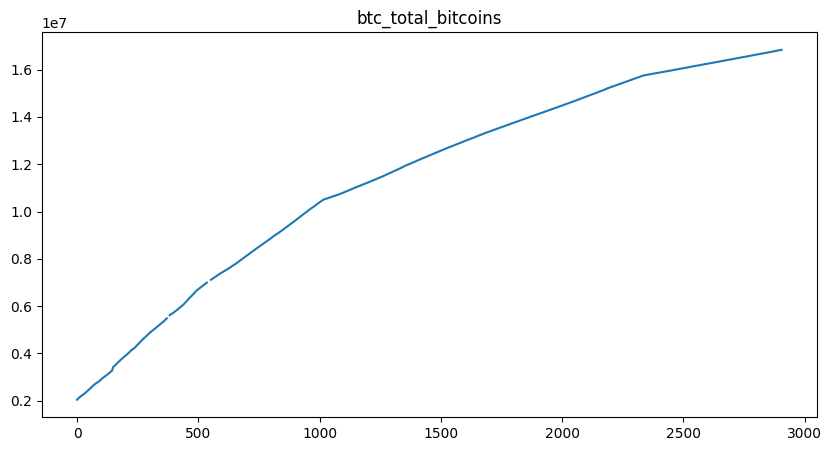

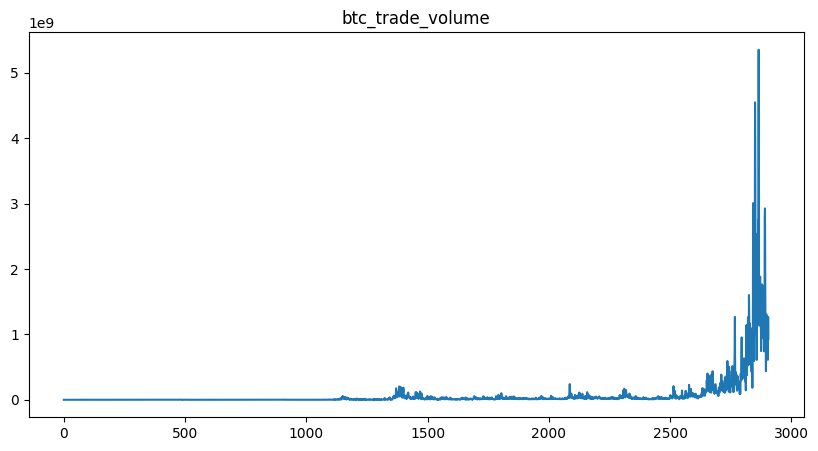

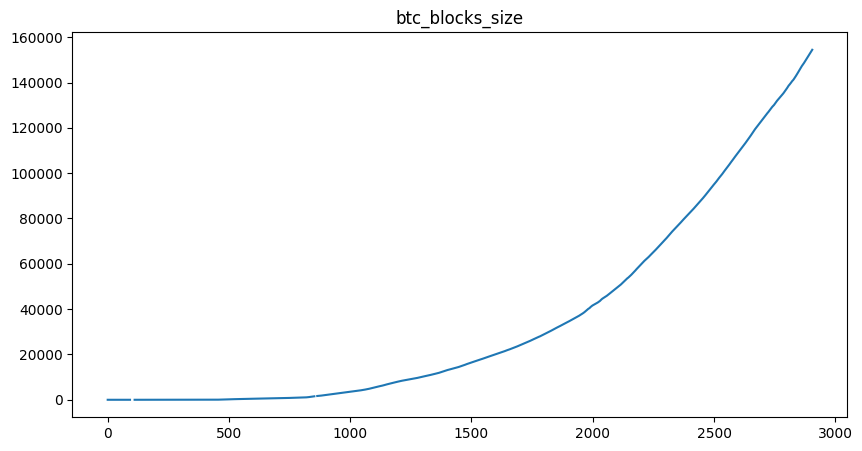

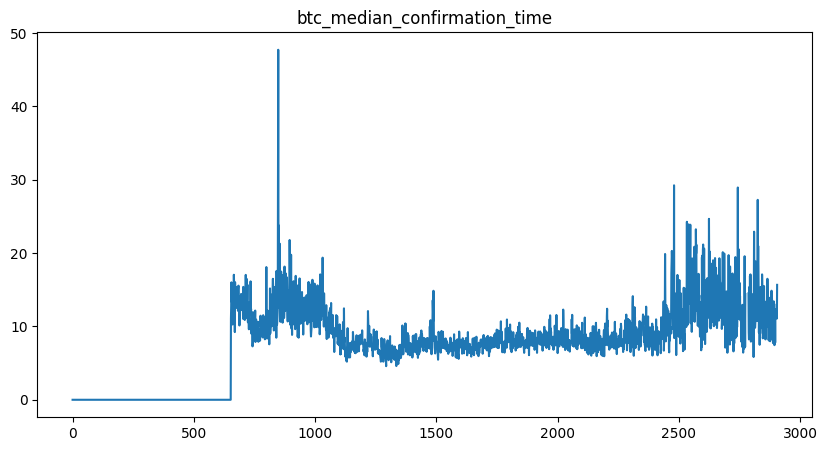

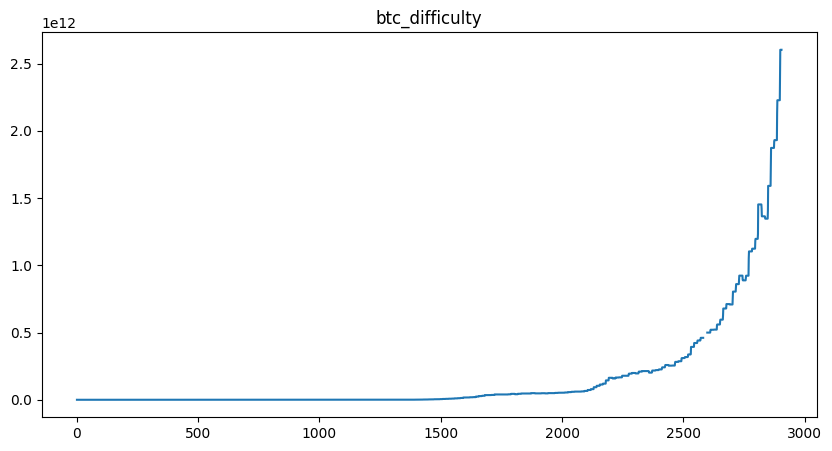

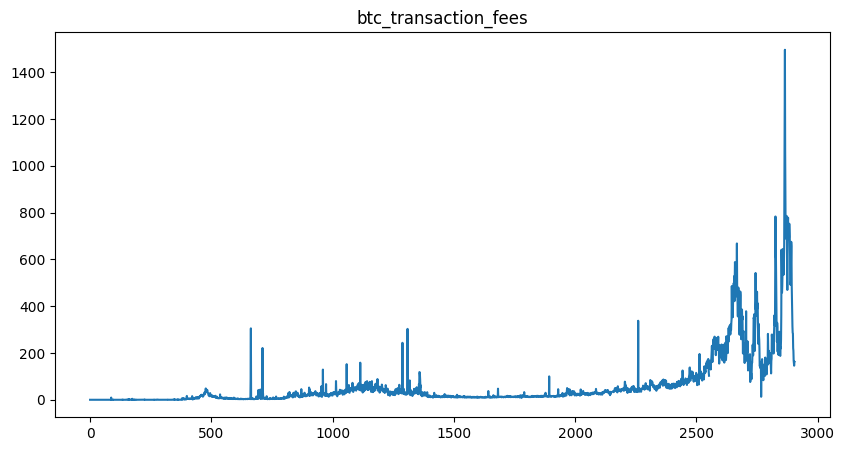

In [78]:
# Write your implementation of the function below this line

######### SOLUTION #########

# In the end, you should have these four variables assigned to their corresponding values
x_train_scaled, x_test_scaled, y_train, y_test = None, None, None, None

# Task (i): Remove the `date` column
if 'Date' in data.columns:
    data.drop('Date', axis=1, inplace=True)

# Task (ii): Identify NaNs and impute
# Identify columns with missing values
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Print columns with missing values
print("Columns with missing values:")
print(missing_data)

# Plot missing values using line plots for each column with missing values
for column in missing_data.index:
    plt.figure(figsize=(10, 5))
    plt.plot(data[column])
    plt.title(column)
    plt.show()

# Since we see an increasing trend in the missing values, we will impute them using the ffill method
data.fillna(method='ffill', inplace=True)

# Task (iii): Split data
X = data.drop('btc_market_price', axis=1)  # Assuming btc_market_price is the target
y = data['btc_market_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Task (iv): Scale features
scaler = StandardScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

######### SOLUTION END #########

## Rubric

- +1 point for removing date column
- +14 points for identifying the reasonable way to impute NaNs justifying them with plots
- +5 points for splitting data into train and validation
- +5 points for reasonable scaling of features

# Part II: Polynomial regression with L1-norm (Polynomial Lasso regression) (15 points)

For this part, we have provided you with a sample code that implements **linear regression** using **L2 regularization** with lambda **$\lambda$ (aka alpha in scikit-learn)** chosen by using **grid search** with a **5-fold cross validation**.

Copy/reuse/modify the code we provide accordingly to implement a **polynomial regression** using **L1-regularization**, and evaluate it against the linear regression model using **Mean Squared Error (MSE)** and **R-squared score ($R^{2}$)**

## Sample code for Linear regression with L2-norm (Linear Ridge regression)

Run the code below to see how linear regression with L2-norm performs.

In [79]:
######### SAMPLE CODE #########

# Defining a range of alpha values for ridge
# NOTE: alpha parameter in Ridge corresponds to lambda we talked about earlier
alphas = np.linspace(0.001,0.5,100)

# Initializing the instance of Ridge
ridge = Ridge()

# Setting parameter grid for grid search
param_grid = {'alpha': alphas}

# defining grid search with 5-fold cross validation
grid_search = GridSearchCV(ridge, param_grid, cv = 5)

# fitting the train
grid_search.fit(x_train_scaled, y_train)

# Printing the best set of parameters
print('Best parameters {}'.format(grid_search.best_params_))

# Printing the best score (here score is R squared score)
print('Best score {}'.format(grid_search.best_score_))

Best parameters {'alpha': 0.021161616161616163}
Best score 0.9726204531613097


In [80]:
# Finally we train our model on the optimal alpha

linear_ridge_optimal = Ridge(alpha=grid_search.best_params_['alpha'])
linear_ridge_optimal.fit(x_train_scaled, y_train)

Ridge(alpha=0.021161616161616163)

In [81]:
# And finally, we evaluate our model on our training set and held-out test set

def evaluate(X,Y, model, is_test=False):
    if is_test:
        print ("Test Mean Square Error (MSE)",
               mean_squared_error(Y, model.predict(X)))
        print ("Test R-squared Score (R2)",
               r2_score(Y, model.predict(X)))
    else:
        print ("Train Mean Square Error (MSE)",
               mean_squared_error(Y, model.predict(X)))
        print ("Train R-squared Score (R2)",
               r2_score(Y, model.predict(X)))

evaluate(x_train_scaled, y_train, linear_ridge_optimal)
evaluate(x_test_scaled, y_test, linear_ridge_optimal, is_test=True)


###### END SAMPLE CODE #######

Train Mean Square Error (MSE) 118007.074684413
Train R-squared Score (R2) 0.9762151022831523
Test Mean Square Error (MSE) 118590.39825606869
Test R-squared Score (R2) 0.9822711616730392


## Polynomial regression with L1-norm (Polynomial Lasso regression)

Copy the code from above, modify it to work for Polynomial Lasso regression below with degree 2, and evaluate it.

*Note: if it takes a lot of time to run (i.e. > 1 minute), you may choose to try only the following alpha values: `0.001, 0.01, 0.1, 10 , 100`. It is typical to first try out a small subset of alpha values, and then narrow the range later*

In [82]:
# Write your code below
######### SOLUTION #########
# Polynomial transformation of features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# Define a range of alpha values
alphas = np.linspace(0.001,0.5,100)

# Initializing the instance of Lasso
lasso = Lasso()

# Setting parameter grid for grid search
param_grid = {'alpha': alphas}

# Defining grid search with 5-fold cross validation
grid_search = GridSearchCV(lasso, param_grid, cv=5)

# Fitting the train data
grid_search.fit(x_train_poly, y_train)

# Print the best parameters and score
print('Best parameters {}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

# Train the model with optimal alpha
poly_lasso_optimal = Lasso(alpha=grid_search.best_params_['alpha'])
poly_lasso_optimal.fit(x_train_poly, y_train)

# Evaluate the model
def evaluate(X, Y, model, is_test=False):
    pred = model.predict(X)
    if is_test:
        print("Test Mean Square Error (MSE)", mean_squared_error(Y, pred))
        print("Test R-squared Score (R2)", r2_score(Y, pred))
    else:
        print("Train Mean Square Error (MSE)", mean_squared_error(Y, pred))
        print("Train R-squared Score (R2)", r2_score(Y, pred))

evaluate(x_train_poly, y_train, poly_lasso_optimal)
evaluate(x_test_poly, y_test, poly_lasso_optimal, is_test=True)

######### SOLUTION END #######

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.974e+06, tolerance: 8.770e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.113e+06, tolerance: 9.371e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best parameters {'alpha': 0.4647171717171717}
Best score 0.9991919566536136
Train Mean Square Error (MSE) 2343.759990916784
Train R-squared Score (R2) 0.9995276038169247
Test Mean Square Error (MSE) 2407.4276851677164
Test R-squared Score (R2) 0.9996400982133307


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.006e+06, tolerance: 1.153e+06
  model = cd_fast.enet_coordinate_descent(


## Rubric

- +10 points for reasonable code for Polynomial lasso regression model
- +5 points for proper evaluation of the linear ridge regression model

# Part III: Target Scaling (10 points)

We typically talk about the importance of feature scaling. What about our **target variable** i.e. $y$? Should we scale our target variable? In a theoretical sense, what is the impact of scaling (normalizing or standardizing) our target variable on our regression model and our evaluation? (If you take your reasoning from an external source, please cite your source.)

## Target Scaling in Regression Models

- **When to Scale**: 
  - From what I've learnt from another ML course I've taken, we should scale if the range of target values is wide, particularly in models using gradient descent.
  - Scaling target variables is useful for model comparison and in specific models like neural networks.

- **Impact on Regression Models**:
  - **Coefficient Interpretation**: Changes the interpretation of coefficients to the scale of the normalized/standardized target.
  - **Model Fit**: Does not affect relative fit metrics like R-squared but affects absolute metrics like MSE or MAE.
  - **Evaluation Metrics**: Absolute metrics are scale-sensitive; relative metrics are not.

- **Practical Considerations**:
  - **Reversibility**: We should be able to reverse scaling for practical application and interpretation.
  - **Necessity**: The choice to scale our target variable is dependent on the model and data characteristics; it is not universally required.

## Rubric

- +2 points for a logical answer with reasoning to whether we should scale our target variable, and if so when.
- +4 points for a logical answer with reasoning to what is the effect of scaling the target variable on the model.
- +4 points for a logical answer with reasoning to what is the effect of scaling the target variable on the evaluation.


# Final Note on Evaluation and Baselines

What is a good model? You can compare two models against each other, and see which one performs better across different metrics. In the above example, it is very clear that one model performs better than the other across both the metrics we wanted to evaluate them against. But that only tells us **which model is better**, it does **not** tell us *if a model is good enough*. It is important to create reasonable baselines for your machine learning models to compare the performance of your model against. One way to do that is to look at the literature. For example, if you are proposing a new bitcoin prediction model with an MSE of 2000, you should survey other bitcoin prediction models proposed in the literature across the same dataset, across the same train-test split, and fairly compare your performance against them across the same metrics.

It is also important to create *trivial baselines* for your model. For example, for a univariate regression model, a reasonable trivial baseline would be that your model at the very least performs better than the mean of the data. If it is just predicting the mean, then it is not really learning any relationship between features and the outcome variable, it is simply ignoring the features. Similarly, if by just predicting the mean one is getting an R-squared score of 0.95 and your model is not even as good as that, then what's the point? And if it is performing only slightly better, is it statistically significant? That's where you'll use your knowledge of statistics. :)

What would be a good baseline for a time series model? Well the dataset that you just worked with was actually a time series data, though we treated it as a simple univariate regression model by throwing away the `date` variable. For a time series model, some trivial baselines that are often surprisingly hard to beat are: **historical mean/average** of the data, and **for a given time period `t` predicting the value of `t` to be what the value of dependent variable was at time `t-1`**. If you think about it, this actually makes sense: for example, if you say that *today's weather is going to be exactly the same as yesterday's weather*, more often than not, you will be right. In fact, many time series models take advantage of this by adding the value (or average) of the dependent variable of the instance(s) at time `t-1` to be a feature for instance(s) at time `t`.

